In [106]:
import pandas as pd
import h5py
% matplotlib inline

In [26]:
survey_h5 = h5py.File(r'R:\SoundCastDocuments\2014Estimation\Files_From_Mark_2014\xxxxP14\skims_attached\survey2014_new.h5')
daysim_h5 = h5py.File(r'R:\SoundCast\releases\TransportationFutures2010\outputs\daysim_outputs.h5')

In [58]:
pd.set_option('display.precision', 4)

In [31]:
def h5_to_df(h5file, table_list):
    """
    Load h5-formatted data based on a table list. Assumes heirarchy of a set of tables.
    """
    output_dict = {}
    
    for table in table_list:
        df = pd.DataFrame()
        for field in h5file[table].keys():
            df[field] = h5file[table][field][:]
            
        output_dict[table] = df
        
    return output_dict

In [47]:
# Load subset of a dataframe as needed
def h5_subset(h5file, table, fields):
    df = pd.DataFrame()
    for field in fields:
        df[field] = h5file[table][field][:]

In [405]:
survey = h5_to_df(survey_h5, table_list=['Household','Trip','Tour','Person','HouseholdDay'])
labels_applied = False

In [402]:
daysim = h5_to_df(daysim_h5, table_list=['Household','Trip','Tour','Person','HouseholdDay'])
labels_applied = False

In [99]:
output_dir = 'C:\Users\Brice'

## Add Labels

In [419]:
# apply labels all based on table, field, and value
labels = pd.read_csv(r'C:\Users\Brice\SUMMARY_REDO\variable_labels.csv')

# Only run this once, set labels_applied = False in loading 
if not labels_applied:
    for table in labels['table'].unique():
        df = labels[labels['table'] == table]
        for field in df['field'].unique():
            newdf = df[df['field'] == field]
            local_series = pd.Series(newdf['text'].values, index=newdf['value'])
#             survey[table][field] = survey[table][field].map(local_series)
            daysim[table][field] = daysim[table][field].map(local_series)

# Only run this once
labels_applied = True

# Tour Mode Share

            survey  daysim  % difference
Bike         0.014   0.009        -0.336
HOV2         0.219   0.237         0.084
HOV3+        0.190   0.206         0.084
Other        0.010     NaN           NaN
Park         0.010   0.007        -0.284
SOV          0.348   0.389         0.118
School Bus   0.038   0.048         0.272
Transit      0.056   0.032        -0.432
Walk         0.116   0.073        -0.376
total        1.000   1.000        -0.870


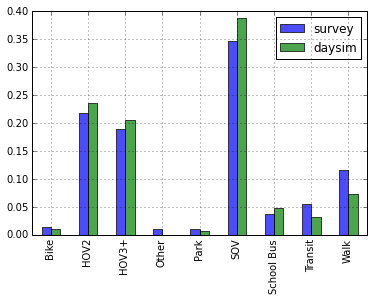

In [421]:
results_df = pd.DataFrame()
mydict = {'survey': survey['Tour'], 'daysim': daysim['Tour']}
for name, df in mydict.iteritems():
    results_df[name] = (df.groupby('tmodetp').sum()['toexpfac'])/df['toexpfac'].sum()

# Difference
results_df['% difference'] = (results_df['daysim']-results_df['survey'])/results_df['survey']

results_df.loc['total'] = results_df.sum(axis=0)
fname = 'tour_mode_share'
results_df.to_csv(output_dir + r'\\' + fname + '.csv')

print results_df

results_df[['survey','daysim']].drop('total',axis=0).plot(kind='bar', alpha=0.7)

# Tour Mode Share by Purpose

In [449]:
results_dict = {}
mydict = {'survey': survey['Tour'], 'daysim': daysim['Tour']}
for name, df in mydict.iteritems():
    tempdf = pd.pivot_table(data=df,index='tmodetp',columns='pdpurp',values='toexpfac',aggfunc='sum')
    tempdf = tempdf.apply(lambda row : row/row.sum(), axis=0)
    tempdf.loc['total'] = tempdf.sum(axis=0)
    results_dict[name] = tempdf
    



# # Difference
# results_df['% difference'] = (results_df['daysim']-results_df['survey'])/results_df['survey']

# results_df.loc['total'] = results_df.sum(axis=0)
# fname = 'tour_mode_share'
# results_df.to_csv(output_dir + r'\\' + fname + '.csv')

# print results_df

# results_df[['survey','daysim']].drop('total',axis=0).plot(kind='bar', alpha=0.7)

In [445]:
# Join daysim and survey records together
df = pd.merge(results_dict['survey'], results_dict['daysim'])

In [453]:
results_dict['daysim']

pdpurp,Escort,Meal,Personal Business,School,Shop,Social,Work
Bike,0.003,0.005,0.011,0.015,0.011,0.008,0.011
HOV2,0.391,0.345,0.235,0.145,0.210,0.292,0.129
HOV3+,0.536,0.176,0.147,0.292,0.111,0.167,0.060
Park,NaN,NaN,NaN,NaN,NaN,NaN,0.028
SOV,0.015,0.324,0.542,0.101,0.547,0.391,0.678
School Bus,NaN,NaN,NaN,0.326,NaN,NaN,NaN
Transit,0.000,0.015,0.021,0.033,0.020,0.019,0.072
Walk,0.054,0.134,0.044,0.089,0.101,0.124,0.022
total,1.000,1.000,1.000,1.000,1.000,1.000,1.000


In [437]:
results_dict['daysim'].index

Index([u'Bike', u'HOV2', u'HOV3+', u'Park', u'SOV', u'School Bus', u'Transit', u'Walk', u'total'], dtype='object')

In [386]:
local_series

value
1            Random Proportional
2        Transit Area Enrichment
3                Ferry Intercept
4        Park and Ride Intercept
dtype: object

In [397]:
survey[table][field]

0             Ferry Intercept
1             Ferry Intercept
2         Random Proportional
3             Ferry Intercept
4             Ferry Intercept
5             Ferry Intercept
6     Transit Area Enrichment
7             Ferry Intercept
8             Ferry Intercept
9     Transit Area Enrichment
10            Ferry Intercept
11        Random Proportional
12    Transit Area Enrichment
13            Ferry Intercept
14    Transit Area Enrichment
...
7945    NaN
7946    NaN
7947    NaN
7948    NaN
7949    NaN
7950    NaN
7951    NaN
7952    NaN
7953    NaN
7954    NaN
7955    NaN
7956    NaN
7957    NaN
7958    NaN
7959    NaN
Name: samptype, Length: 7960, dtype: object

In [340]:
test = pd.Series(newdf['text'])
test.index = newdf['value']

In [341]:
test

value
0                   None
1           Full Network
2        No-Toll Network
3              Local Bus
4             Light Rail
5            Premium Bus
6          Commuter Rail
7                  Ferry
Name: text, dtype: object

In [270]:
local_series = pd.Series(newdf['text'],index=newdf['value'])

In [349]:
local_series

value
0                   None
1           Full Network
2        No-Toll Network
3              Local Bus
4             Light Rail
5            Premium Bus
6          Commuter Rail
7                  Ferry
dtype: object

0                  Shop
1     Personal Business
2                School
3                School
4                School
5                School
6                  Work
7                School
8                School
9     Personal Business
10               School
11                 Meal
12                 Meal
13               School
14               School
...
19224               Social
19225               Social
19226                 Work
19227                 Work
19228                 Work
19229                 Work
19230                 Work
19231    Personal Business
19232    Personal Business
19233    Personal Business
19234                 Work
19235                 Work
19236               Social
19237                 Work
19238                 Meal
Name: pdpurp, Length: 19239, dtype: object

In [267]:
lookup_df

,text
value,
0,None/Home
1,Work
2,School
3,Escort
4,Personal Business
5,Shop
6,Meal
7,Social
8,Social


In [225]:
mydict = newdf[['value','text']].to_dict()['text']
tour.replace({'pdpurp':mydict},inplace=True)

In [226]:
tour.columns

Index([u'c', u'd', u'day', u'fhtindx1', u'fhtindx2', u'hhno', u'id', u'jtindex', u'parent', u'pdpurp', u'phtindx1', u'phtindx2', u'pno', u'subtrs', u't', u'tardest', u'tarorig', u'tautocost', u'tautodist', u'tautotime', u'tdadtyp', u'tdpcl', u'tdtaz', u'tlvdest', u'tlvorig', u'tmodetp', u'toadtyp', u'toexpfac', u'topcl', u'totaz', u'tour', u'tpathtp', u'tripsh1', u'tripsh2'], dtype='object')

In [228]:
mydict

{51: 'Random Proportional',
 52: 'Transit Area Enrichment',
 53: 'Ferry Intercept',
 54: 'Park and Ride Intercept'}

In [227]:
tour['pdpurp']

0     5
1     4
2     2
3     2
4     2
5     2
6     1
7     2
8     2
9     4
10    2
11    6
12    6
13    2
14    2
...
19224    7
19225    7
19226    1
19227    1
19228    1
19229    1
19230    1
19231    4
19232    4
19233    4
19234    1
19235    1
19236    7
19237    1
19238    6
Name: pdpurp, Length: 19239, dtype: int32